In [5]:
import sys
sys.path.append('../../../scripts')
from data_preparation import load_data, convert_datatypes, handle_missing_values, drop_columns, remove_negative_values, calculate_zscore

In [6]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
df = load_data('https://drive.google.com/file/d/1y9zldvzlccESElev3W4GyQCbSZTLkn4P/view?usp=sharing')

### Step 1 - Understand the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [9]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [10]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

### Step 2 - Clean and Prepare Data 


##### Change datatypes to appropriate formats
In the previous step, the Timestamp colum has a data type of Object. So, here it's changed to date time format.

In [11]:
#convert_datatypes(df)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Data Type for Timestamp -",df['Timestamp'].dtypes)
df.head()

Data Type for Timestamp - datetime64[ns]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


Now, let's check for missing values

In [12]:
#handle_missing_values(df)
print(df.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Here we can see that all columns except 'Comments' have non-null values. But the 'Comments' column has null values entirely. So we can go ahead and drop it.

In [13]:
#drop_columns(df)
df = df.drop(['Comments'], axis= 1).copy()
df.shape

(525600, 18)

Now let's look for duplicate values.

In [14]:
print(df.duplicated().sum())

0


We don't have duplicates, so let's move on to handling negative values. The three solar radiation columns, GHI, DNI, DHI have consistent negative values throughout the days. When we take a closer look at the data, there's a direct correlation between these values and night time. And since we're analyzing solar radiation data, we can drop the rows recorded at night or with negative values.

In [15]:
# remove_negative_values(df)
df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
342,2021-10-25 05:43:00,0.0,0.0,0.6,1.2,1.2,25.2,92.7,1.8,2.1,0.3,225.4,4.8,977,0,0.0,25.0,24.8
343,2021-10-25 05:44:00,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0,0.0,25.0,24.7
344,2021-10-25 05:45:00,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0,0.0,25.0,24.7
345,2021-10-25 05:46:00,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0,0.0,25.0,24.7
346,2021-10-25 05:47:00,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0,0.0,25.0,24.7


Let's reset the index since the negative values were removed.

In [16]:
df = df.reset_index(drop=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 05:43:00,0.0,0.0,0.6,1.2,1.2,25.2,92.7,1.8,2.1,0.3,225.4,4.8,977,0,0.0,25.0,24.8
1,2021-10-25 05:44:00,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0,0.0,25.0,24.7
2,2021-10-25 05:45:00,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0,0.0,25.0,24.7
3,2021-10-25 05:46:00,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0,0.0,25.0,24.7
4,2021-10-25 05:47:00,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0,0.0,25.0,24.7


#### Z-Score Analysis

Now, let's move on to outliers. Outliers can be calculated using Z-Score. A Z-Score measures how many standard deviations a data point is from the mean of the dataset. Here we can exclude the Timestamp column because it is consistent and calculating it's Z-Score issues a performance warning due to Adding/subtracting object-dtype array to DatetimeArray not being vectorized.

In [17]:
df_for_zscore = df.drop(['Timestamp'], axis= 1).copy()
df_for_zscore.head(5)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,0.0,0.0,0.6,1.2,1.2,25.2,92.7,1.8,2.1,0.3,225.4,4.8,977,0,0.0,25.0,24.8
1,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0,0.0,25.0,24.7
2,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0,0.0,25.0,24.7
3,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0,0.0,25.0,24.7
4,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0,0.0,25.0,24.7


Since a z-score greater than 3 or less than -3 is considered extreme, here we're filtering outliers greater than the absolute value of 3.

In [18]:
# calculate_zscore(df)
df_zscores = (df_for_zscore - df_for_zscore.mean()) / df_for_zscore.std()
outliers = df_zscores.abs() > 3
df['Outliers'] = outliers.any(axis=1)
outlier_rows = df[df['Outliers'] == True]
print("Count of rows with outlier values -", df['Outliers'].sum())
print(outlier_rows.head(5))

Count of rows with outlier values - 7803
              Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
291 2021-10-25 10:34:00  488.0   11.6  496.2  484.8  479.3  30.5  70.0  2.1   
299 2021-10-25 10:42:00  720.5  256.9  526.6  745.8  737.0  30.6  70.8  2.7   
312 2021-10-25 10:55:00  610.6   74.7  559.0  628.3  620.5  30.5  68.9  1.5   
329 2021-10-25 11:12:00  932.0  495.2  509.2  975.0  963.0  31.0  69.8  1.0   
373 2021-10-25 11:56:00  955.0  710.0  329.8  991.0  979.0  31.6  65.4  1.2   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
291     2.6      0.4  211.2     12.0  979         1            0.0   43.9   
299     3.1      0.4  234.1     13.5  979         1            0.0   44.3   
312     2.6      0.7  227.3     30.2  978         0            0.0   46.9   
329     2.7      0.9  265.4     33.7  978         0            0.0   51.4   
373     3.1      1.1  258.7     39.4  977         0            0.0   60.8   

     TModB  Outliers 

Here we can visualize the outliers in a Boxplot which graphically depicts numerical data through their quartiles and can highlight outliers as points that fall outside of the 'whiskers'. 

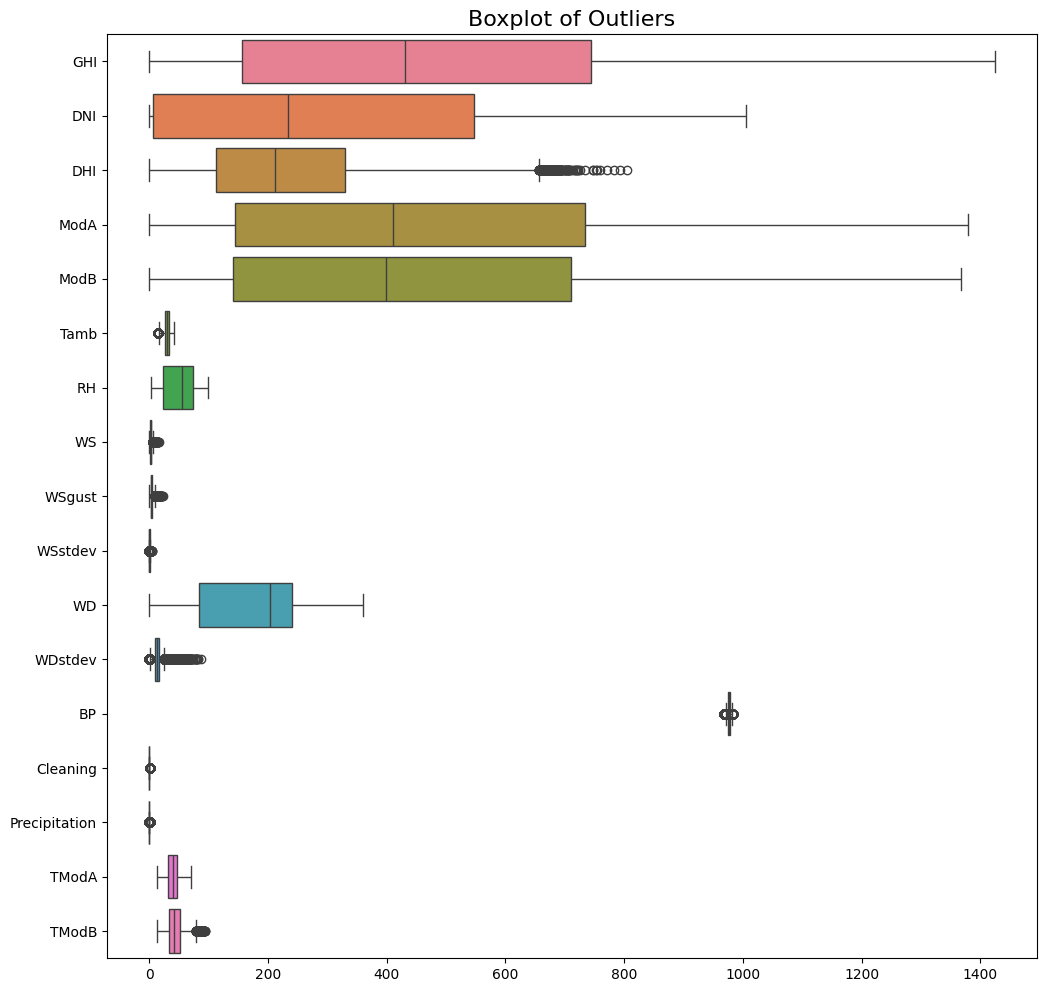

In [19]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df_for_zscore, orient='y')
plt.title('Boxplot of Outliers', fontsize=16)
plt.show()

Here we can see that columns DHI, WD, WSgust, WS have outlier values.

In [20]:
df = df.drop(['Outliers'], axis= 1).copy()

We've gone throught the data preparation steps, now let's save our cleaned data for exploratory data analysis.

In [21]:
df.to_csv("../../../data/prepared/togo_prepared.csv")